Набор данных

Nasdaq Data Link имеет большой набор данных для институциональных инвесторов, финтех-компаний и индивидуальных пользователей. 

Бесплатные и платные данные, доступ к которым можно получить через один из следующих API-интерфейсов Nasdaq Data Link:
- Streaming API для данных в реальном времени
- REST API для данных в реальном времени или с задержкой
- REST API для данных временных рядов
- REST API для данных таблиц

Взяты данные стоимости акций компании SAP c 03.09.2009 по 03.08.2019.

Проведете аналогичные действия для других наборов данных:
- [Rossmann Store Sales](https://www.kaggle.com/competitions/rossmann-store-sales/data)
- [Behavior of the urban traffic of the city of Sao Paulo in Brazil Data Set](http://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil)
- [ISTANBUL STOCK EXCHANGE Data Set](http://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE)

In [1]:
#подключаем библиотеки
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируйте пакет метрик из sklearn для статистического анализа.
from sklearn import metrics
from sklearn.metrics import explained_variance_score


# Пакет для разделения набора данных
from sklearn.model_selection import train_test_split

# Линейная регрессия
from sklearn.linear_model import LinearRegression

In [14]:
url='https://raw.githubusercontent.com/yakushinav/omo/main/data/sap_stock.csv'
data=pd.read_csv(url,index_col='Date')
data.index = pd.to_datetime(data.index)
print(data.head())

             Open   High    Low  Close  Change  Traded Volume     Turnover  \
Date                                                                         
2009-03-09  25.16  25.82  24.48  25.59     NaN      5749357.0  145200289.0   
2009-03-10  25.68  26.95  25.68  26.87     NaN      7507770.0  198480965.0   
2009-03-11  26.50  26.95  26.26  26.64     NaN      5855095.0  155815439.0   
2009-03-12  26.15  26.47  25.82  26.18     NaN      6294955.0  164489409.0   
2009-03-13  26.01  26.24  25.65  25.73     NaN      6814568.0  176228331.0   

            Last Price of the Day  Daily Traded Units  Daily Turnover  
Date                                                                   
2009-03-09                    NaN                 NaN             NaN  
2009-03-10                    NaN                 NaN             NaN  
2009-03-11                    NaN                 NaN             NaN  
2009-03-12                    NaN                 NaN             NaN  
2009-03-13           

In [15]:
# типы данных столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2550 entries, 2009-03-09 to 2019-03-08
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2242 non-null   float64
 1   High                   2543 non-null   float64
 2   Low                    2543 non-null   float64
 3   Close                  2550 non-null   float64
 4   Change                 11 non-null     float64
 5   Traded Volume          2504 non-null   float64
 6   Turnover               2497 non-null   float64
 7   Last Price of the Day  0 non-null      float64
 8   Daily Traded Units     0 non-null      float64
 9   Daily Turnover         7 non-null      float64
dtypes: float64(10)
memory usage: 219.1 KB


In [16]:
#описательная статистика
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


# Выберем множество значимых признаков

Мы используем дневную цену закрытия Close в качестве значения для прогнозирования, поэтому мы можем отбросить другие признаки.

Столбец «Close» имеет числовой тип данных
«Date» является столбцом индекса и содержит значения даты и времени.

In [17]:
# Создадим новый набор данных
df = pd.DataFrame(data, columns=['Close'])

# Заменим индекс в форме даты на числовой индекс
df = df.reset_index()

# Проверим на пропущенные значения
print(df.isna().values.any())

print(df.head())

False
        Date  Close
0 2009-03-09  25.59
1 2009-03-10  26.87
2 2009-03-11  26.64
3 2009-03-12  26.18
4 2009-03-13  25.73


Анализ данных

Когда мы смотрим на изменение цены с течением времени на графике зависимости цены закрытия от времени, мы увидим, что цена постоянно увеличивается с течением времени, и мы также можем оценить, что тренд может быть линейным.

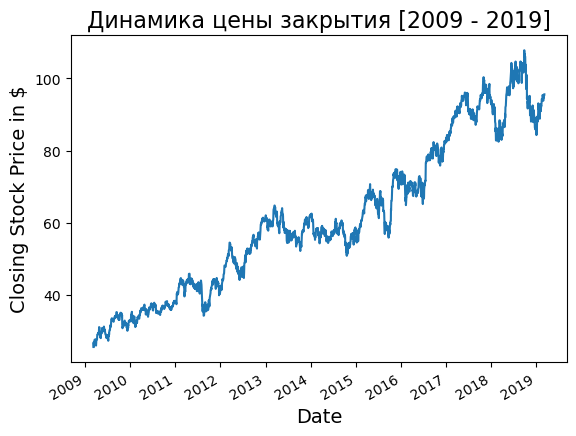

In [18]:
# Подключаем пакет для работы с данным
import matplotlib.dates as mdates

years = mdates.YearLocator() # возьмем каждый год
yearsFmt = mdates.DateFormatter('%Y') # Формат отображения года

# Создаем график
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

ax.plot(df['Date'], df['Close'])

plt.title('Динамика цены закрытия [2009 - 2019]', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Stock Price in $', fontsize=14)
fig.autofmt_xdate()

plt.show()

# Линейная регрессия

Наши данные содержат только одну независимую переменную (X), которая представляет дату и зависимую переменную (Y), которую мы пытаемся предсказать, — это цена акций. Чтобы найти линию близкую к точкам данных,  мы можем использовать простую линейную регрессию.

Линия наилучшего соответствия может быть описана с помощью уравнения
$$
Y=\beta_0+\beta_1X
$$

где

  - Y прогнозируемое значение зависимой переменной
  - $\beta_0$ y-перечечение
  - $\beta_1$ наклон
  - X значение независимой переменной

Цель состоит в том, чтобы найти такие коэффициенты чтобы ошибка, которая представляет собой разницу между каждой точкой в наборе данных и соответствующим прогнозируемым значением, выводимым моделью была минимальна.

In [19]:
# Разбиваем выборку
train, test = train_test_split(df, test_size=0.20)

In [20]:
# Изменить форму индексного столбца в 2D-массив для метода .fit()
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

# Создаем модель машинного обучения
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициенты
print(model.coef_, model.intercept_)

[0.02772135] 25.6549475713121


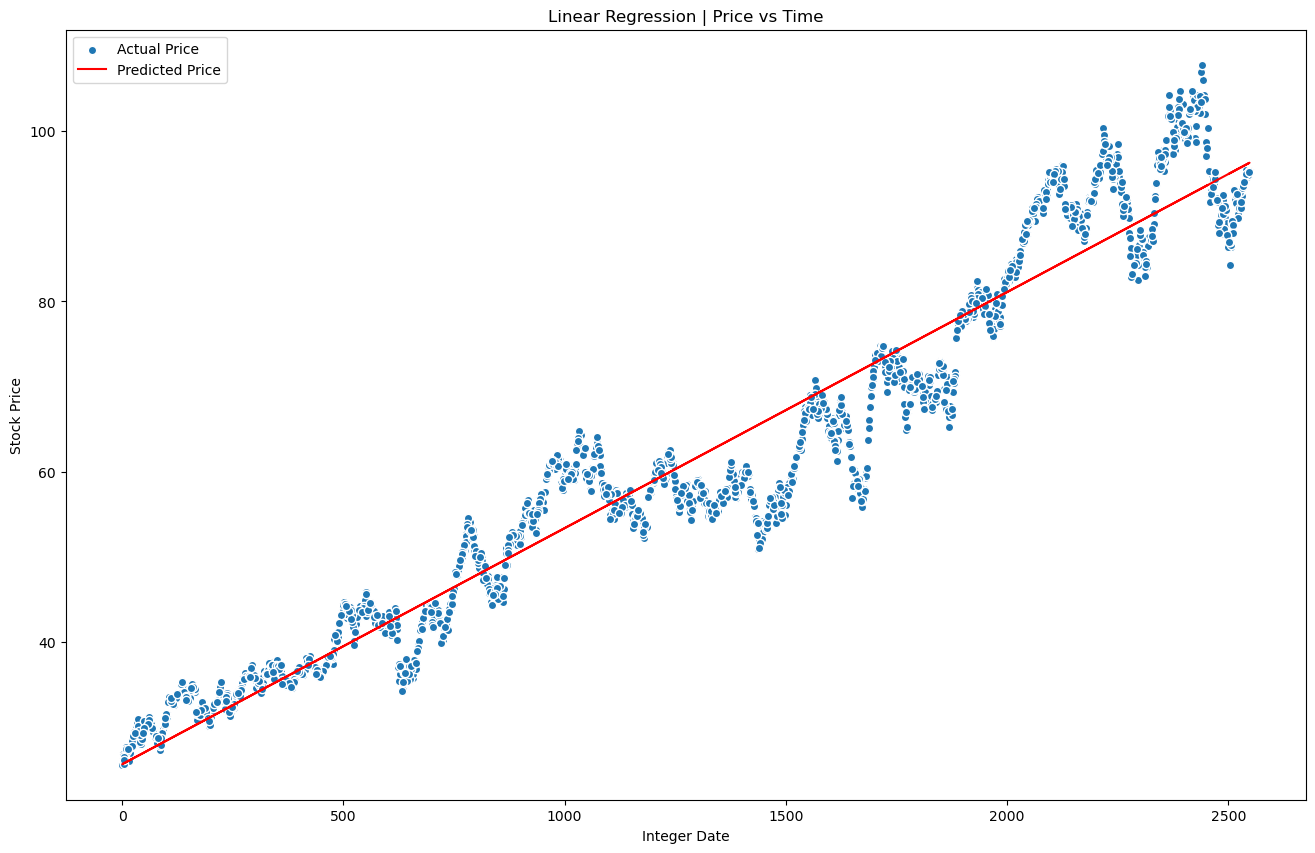

In [24]:
# График исходных данных и модели
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Предсказание

In [25]:
# Тестовые данные
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

# Предсказание
y_pred = model.predict(X_test)

test['Prediction']=y_pred


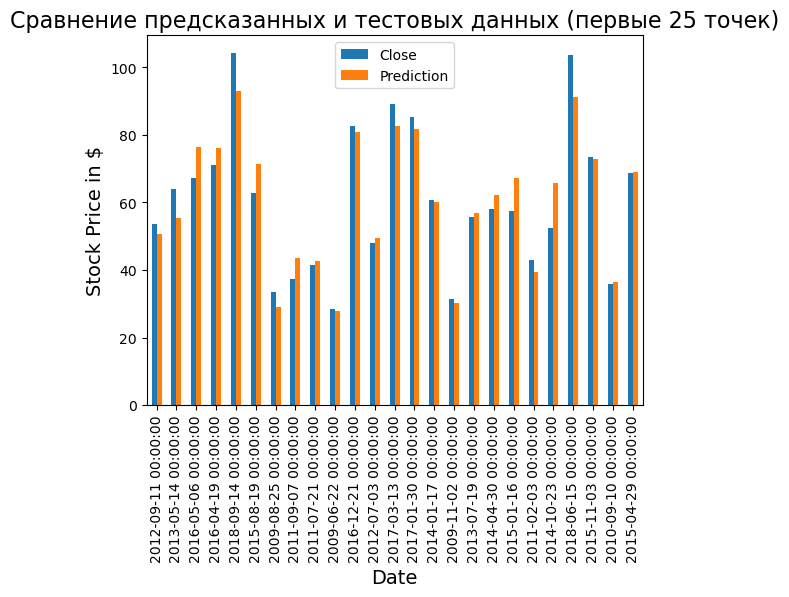

In [26]:
# График
fig, ax = plt.subplots()
test[0:25].plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

plt.title('Сравнение предсказанных и тестовых данных (первые 25 точек)', fontsize=16)

# Метка по оси x
plt.xlabel('Date', fontsize=14)

# Метка по оси y
plt.ylabel('Stock Price in $', fontsize=14)

# Показать график
plt.show()

In [27]:
# Добавим предсказанный тренд к набору данных
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
print(df.head())

# Рассчет ошибок MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))


        Date  Close  Prediction
0 2009-03-09  25.59   25.654948
1 2009-03-10  26.87   25.682669
2 2009-03-11  26.64   25.710390
3 2009-03-12  26.18   25.738112
4 2009-03-13  25.73   25.765833
Mean Absolute Error: 4.217486583895684
Mean Squared Error: 28.982661113428968
Root Mean Squared Error: 5.3835546912266965
R2:  0.9361852589345673
0.936190929562375


# Множественная линейная регрессия

In [28]:
# Создадим новый набор данных
df = pd.DataFrame(data, columns=['Open','High','Low','Close'])

# Проверим на пропущенные значения
print(df.isna().values.any())

df=df.dropna()

# Проверим на пропущенные значения
print(df.isna().values.any())



True
False


In [29]:
# Разделим выборку
train, test = train_test_split(df, test_size=0.20)

X=train[['Open','High','Low']] 
y=train['Close']

lm = LinearRegression()
lm.fit(X, y)

X_test=test[['Open','High','Low']] 
y_test=test['Close']

y_pred=lm.predict(X_test)

# Рассчет ошибок MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.20885286137879364
Mean Squared Error: 0.08485567144655677
Root Mean Squared Error: 0.2912999681540607
R2:  0.9997302105366539
0.9997302233881249
